In [1]:
# importing required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam,RMSprop

In [2]:
# checking tensor version
tf.__version__

'2.4.1'

In [3]:
# Reading the file
df1=np.load('ORL_faces.npz')
df1

In [4]:
# Sp;itting the data
x_train=df1['trainX']
x_test=df1['testX']
y_train=df1['trainY']
y_test=df1['testY']

In [5]:
# checking the shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [6]:
x_train=tf.reshape(x_train,(240,112,92,1))
x_test=tf.reshape(x_test,(160,112,92,1))
x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
x_train/=255
x_test/=255

In [7]:
y_train=keras.utils.to_categorical(y_train,40)
y_test=keras.utils.to_categorical(y_test,40)
print(y_train)
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
model=Sequential()

In [9]:
# Convolutional Layer and Max Pooling 
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[112,92,1]))
model.add(MaxPool2D(pool_size=2))


In [10]:
# Flattening
model.add(Flatten())

In [11]:
# Dense Layer
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=40,activation='softmax'))

In [12]:
# Compiling and Fitting 
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=99,verbose=1,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/99
2/2 [==============================] - 6s 3s/step - loss: 5.1389 - accuracy: 0.0139 - val_loss: 4.5249 - val_accuracy: 0.0500
Epoch 2/99
2/2 [==============================] - 2s 1s/step - loss: 7.7378 - accuracy: 0.0378 - val_loss: 3.1504 - val_accuracy: 0.1063
Epoch 3/99
2/2 [==============================] - 2s 1s/step - loss: 4.8035 - accuracy: 0.0568 - val_loss: 3.0663 - val_accuracy: 0.1500
Epoch 4/99
2/2 [==============================] - 2s 1s/step - loss: 3.9402 - accuracy: 0.0790 - val_loss: 3.1014 - val_accuracy: 0.1625
Epoch 5/99
2/2 [==============================] - 2s 1s/step - loss: 3.6004 - accuracy: 0.0656 - val_loss: 3.1058 - val_accuracy: 0.0938
Epoch 6/99
2/2 [==============================] - 2s 1s/step - loss: 3.2867 - accuracy: 0.1002 - val_loss: 3.0652 - val_accuracy: 0.2125
Epoch 7/99
2/2 [==============================] - 2s 1s/step - loss: 3.0264 - accuracy: 0.1174 - val_loss: 2.9613 - val_accuracy: 0.4313
Epoch 8/99
2/2 [=========================

2/2 [==============================] - 2s 1s/step - loss: 0.0606 - accuracy: 0.9835 - val_loss: 0.2750 - val_accuracy: 0.9375
Epoch 61/99
2/2 [==============================] - 3s 1s/step - loss: 0.0440 - accuracy: 0.9972 - val_loss: 0.2530 - val_accuracy: 0.9375
Epoch 62/99
2/2 [==============================] - 2s 1s/step - loss: 0.0553 - accuracy: 0.9891 - val_loss: 0.2167 - val_accuracy: 0.9250
Epoch 63/99
2/2 [==============================] - 2s 1s/step - loss: 0.0355 - accuracy: 0.9918 - val_loss: 0.1985 - val_accuracy: 0.9312
Epoch 64/99
2/2 [==============================] - 2s 1s/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.1968 - val_accuracy: 0.9250
Epoch 65/99
2/2 [==============================] - 2s 1s/step - loss: 0.0600 - accuracy: 0.9811 - val_loss: 0.2125 - val_accuracy: 0.9375
Epoch 66/99
2/2 [==============================] - 2s 1s/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 0.2460 - val_accuracy: 0.9375
Epoch 67/99
2/2 [=============================

In [13]:
# displaying the loss value and Accuracy for test data
r=model.evaluate(x_test,y_test,verbose=0)
r

[0.33245018124580383, 0.9375]

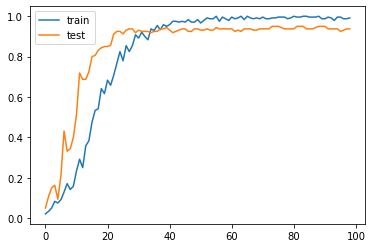

In [14]:
# Plotting the graph for train and test data
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()